# Représentation en chaos game de génomes de virus

Nous aurons besoin de matplotlib pour la représentation.

In [1]:
import matplotlib.pyplot as plt

Premièrement, on charge les séquences à partir des fichiers `.fasta`.

In [2]:
# Get sequence SARS-COV2.
seq_SARSCOV2 = ""
with open("MN908947.3.fasta") as f:
    for line in f:
        if not line.startswith(">"):
            seq_SARSCOV2 += line.strip()

# Get sequence SARS-COV.
seq_SARSCOV = ""
with open("FJ882960.1.fasta") as f:
    for line in f:
        if not line.startswith(">"):
            seq_SARSCOV += line.strip()

# Get sequence HIV.
seq_HIV = ""
with open("D86068.1.fasta") as f:
    for line in f:
        if not line.startswith(">"):
            seq_HIV += line.strip()

On crée les 4 sommets.

In [3]:
# Coors of summits.
A = (0, 1)
T = (1, 1)
G = (1, 0)
C = (0, 0)

Ensuite on va générer les points dans l'espace du chaos game pour le premier virus SARS-COV. Chaque point sera stocké dans des listes `list_x` et `list_y`. Bien avoir en tête que :

- on démarre du milieu de l'espace du chaos game, c'est-à-dire à la coordonnée $(0.5, 0.5)$
- la formule du centre d'un segment $AB$ est : $x_{center} = \frac{(x_A + x_B)}{2}$

In [4]:
# SARS-COV
x, y = 0.5, 0.5
list_x = [x]
list_y = [y]

# SARS-COV
for base in seq_SARSCOV:
    if base == "A":
        x = (x + A[0]) / 2
        y = (y + A[1]) / 2
    if base == "T":
        x = (x + T[0]) / 2
        y = (y + T[1]) / 2
    if base == "G":
        x = (x + G[0]) / 2
        y = (y + G[1]) / 2
    if base == "C":
        x = (x + C[0]) / 2
        y = (y + C[1]) / 2
    list_x.append(x)
    list_y.append(y)

On fait de même pour les 2 autres virus.

In [5]:
# SARS-COV2
x, y = 0.5, 0.5
list_x2 = [x]
list_y2 = [y]

for base in seq_SARSCOV2:
    if base == "A":
        x = (x + A[0]) / 2
        y = (y + A[1]) / 2
    if base == "T":
        x = (x + T[0]) / 2
        y = (y + T[1]) / 2
    if base == "G":
        x = (x + G[0]) / 2
        y = (y + G[1]) / 2
    if base == "C":
        x = (x + C[0]) / 2
        y = (y + C[1]) / 2
    list_x2.append(x)
    list_y2.append(y)

# HIV
x, y = 0.5, 0.5
list_x3 = [x]
list_y3 = [y]

for base in seq_HIV:
    if base == "A":
        x = (x + A[0]) / 2
        y = (y + A[1]) / 2
    if base == "T":
        x = (x + T[0]) / 2
        y = (y + T[1]) / 2
    if base == "G":
        x = (x + G[0]) / 2
        y = (y + G[1]) / 2
    if base == "C":
        x = (x + C[0]) / 2
        y = (y + C[1]) / 2
    list_x3.append(x)
    list_y3.append(y)

Maintenant il est temps de générer les graphes avec la fonction `scatter()` de matplotlib. Pour cela, on peut uitiliser la fonction `subplots()` permettant de générer plusieurs graphes sur la même figure. Comme on n'est pas intéressé par les axes, on peut les éliminer avec la méthode `.axis()` et l'argument `"off"`.

(0.0, 1.0, 0.0, 1.0)

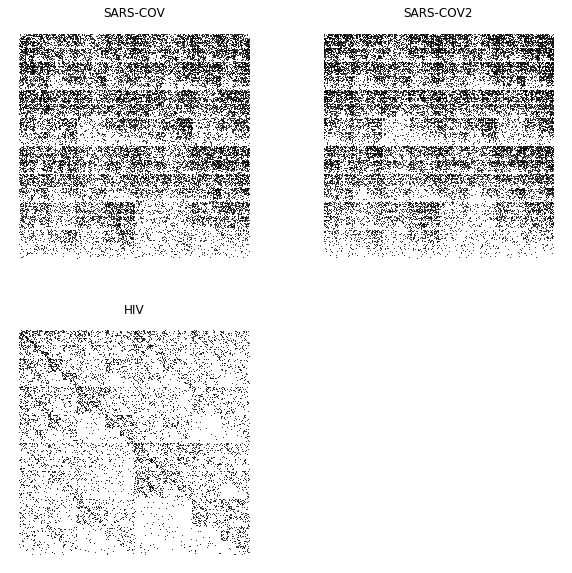

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].scatter(list_x, list_y, color="black", s=1, linewidths=0)
axs[0, 0].set_title('SARS-COV')
axs[0, 0].axis("off")

axs[0, 1].scatter(list_x2, list_y2, color="black", s=1, linewidths=0)
axs[0, 1].set_title('SARS-COV2')
axs[0, 1].axis("off")

axs[1, 0].scatter(list_x3, list_y3, color="black", s=1, linewidths=0)
axs[1, 0].set_title('HIV')
axs[1, 0].axis("off")

#axs[1, 1].plot()
#axs[1, 1].set_title()
axs[1, 1].axis("off")

#plt.show()

Nous pouvons maintenant admirer ces représentations :-). On voit clairement que les deux premiers virus sont de la même famille et que le troisième diffère. Au delà de l'aspect visuel pour voir l'empreinte du génome, que peut-on faire de ces graphes ? Et bien, on peut extraire des matrices contenant la composition en mots de 1 lettre (compo en base), 2 lettres (compo en AA, AT, .., CC), en mots de 3 lettres (AAA, AAT, ...), et ainsi de suite (cf. figure ci-dessous). Voyez-vous des carrés apparaitre ? Et bien selon la grosseur de ces carrés, il s'agit de mots de 2 ou 3 lettres (voire plus).

![Principe signature génomique](signature_genomique.png)

On appelle communément ces matrices de comptage "signature génomique". Avec les signatures génomiques il est  possible de calculer des distances entre génomes et créer des arbres, bref cela permet de faire de la phylogénie sur la base de la composition en mots de n lettres.